In [1]:
import numpy as np

threshold = 10

def fraction(a: int, b: int) -> tuple[int, int]:
    gcd = np.gcd(a, b)
    if gcd == 1:
        return (a, b)
    elif gcd == b:
        return (int(a/b), 1)
    return (int(a / gcd), int(b / gcd))

def distribute_wins(items: int, rounds: int) -> np.ndarray:
    if np.gcd(items, rounds) != 1:
        res = np.array([])
        num, den = fraction(items, rounds)

        for __ in range(int(rounds / den)):
            part = np.append(np.ones(num), np.zeros(abs(num - den)))
            np.random.shuffle(part)
            res = np.append(res, part)

        return res.astype(np.int32)
    
    rem = 0
    while np.gcd(items, rounds) == 1:
        items -= 1
        rem += 1
    
    res = distribute_wins(items, rounds)
    zeros, = np.where(res == 0)

    while rem:
        idx = np.random.choice(len(zeros) - 1)
        res[zeros[idx]] = 1
        np.delete(zeros, idx)
        rem -= 1

    return res

dist = distribute_wins(33, 50)
dist, len(dist), np.sum(dist, dtype=np.int32)

(array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0]),
 50,
 33)

In [2]:
import random

def distribute_items(a, b):
    remaining_items = a
    remaining_rounds = b
    results = []
    
    max_cluster = 2
    
    for __ in range(b):
        probability = remaining_items / remaining_rounds
        
        if len(results) >= max_cluster:
            last_few = results[-max_cluster:]
            if all(x == 1 for x in last_few):
                probability *= 0.5
            elif all(x == 0 for x in last_few):
                probability = min(probability * 1.5, 1.0)
        
        if random.random() < probability:
            results.append(1)
            remaining_items -= 1
        else:
            results.append(0)
        
        remaining_rounds -= 1
        
        if remaining_items == 0:
            results.extend([0] * remaining_rounds)
            break
    
    return results

items = {
    1: 5,
    2: 5,
    3: 10
}

a = sum(items[key] for key in items)
b = 30
distribution = distribute_items(a, b)
wins = distribution.count(1)

rem = abs(wins - a)
while rem:
    i = 0
    while distribution[i] == 1:
        i += 1
    distribution[i] = 1
    rem -= 1

print(distribution)
print("Wins:", distribution.count(1))

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
Wins: 20


In [3]:
modcong = lambda a, b, m: (a - b) % m == 0

modcong(1, 11, 5), modcong(7, 2, 5), modcong(1 * 2, 11 * 7, 5), modcong(1 * 7, 11 * 2, 5)

(True, True, True, True)

In [4]:
from itertools import combinations

def relative_primes(*args):
    for a, b in combinations(args, 2):
        if np.gcd(a, b) != 1:
            return False
    return True

relative_primes(12, 17, 31, 37)

True

In [5]:
nums = (144, 89)
np.gcd.reduce(nums), np.lcm.reduce(nums)

(1, 12816)

In [6]:
[i for i in range(-100, 101) if (i - 24) % 25 == 0] == [i for i in range(-100, 101) if (i + 1) % 25 == 0]

True

In [7]:
n = 10
num = int("".join(['0', *[str(i) for i in range(1, 10)] * n]))

for c in [1001, 10001, 100001]:
    print(int((num - num % c) / c))

123333455667788996251331285501213313667718769123845790045146053214873932565811652722688
12344444467898888196814968867235108211781128939027316439673344238044231654456697028608
1234555545679111126251763288732417803440402386344680016861622572625811654387399917568


In [8]:
modcong(80, 5, 17)

False

In [9]:
import pandas as pd

string = "SIX HUNDRED AND THIRTY TWO".replace(' ', '')
codes = list(map(lambda c: ord(c) - ord('A'), string))
ceaser = list(map(lambda p: (p + 3) % 26, codes))
print(len(set(string)))

df = pd.DataFrame({
    'letter': list(string),
    'code': codes,
    'ceaser': ceaser,
    'enc_letter': map(lambda c: chr(c + ord('A')), ceaser)
})

display(df.drop_duplicates())
display(df)

14


,letter,code,ceaser,enc_letter
0,S,18,21,V
1,I,8,11,L
2,X,23,0,A
3,H,7,10,K
4,U,20,23,X
5,N,13,16,Q
6,D,3,6,G
7,R,17,20,U
8,E,4,7,H
10,A,0,3,D


,letter,code,ceaser,enc_letter
0,S,18,21,V
1,I,8,11,L
2,X,23,0,A
3,H,7,10,K
4,U,20,23,X
5,N,13,16,Q
6,D,3,6,G
7,R,17,20,U
8,E,4,7,H
9,D,3,6,G


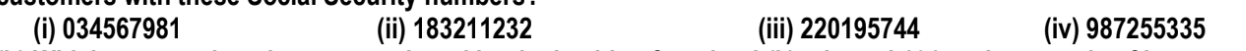

In [10]:
h = lambda k: k % 97

for k in [34567981, 183211232, 220195744, 987255335]:
    print(k, h(k))

34567981 91
183211232 57
220195744 21
987255335 5


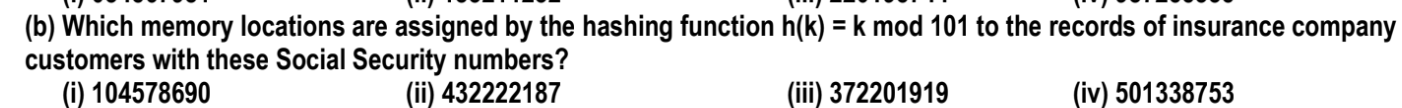

In [11]:
h = lambda k: k % 101

for k in [104578690, 432222187, 372201919, 501338753]:
    print(k, h(k))

104578690 58
432222187 60
372201919 52
501338753 3


In [12]:
def rand(i, a, b, m, s):
    if i == 0:
        return s
    return (a*rand(i-1, a, b, m, s) + b) % m

for i in range(1, 6):
    print(rand(i, 4, 1, 7, 3), end=" ")
print()

for i in range(1, 6):
    print(rand(i, 7, 2, 9, 5), end=" ")

6 4 3 6 4 
1 0 2 7 6 

In [13]:
def check_digit(upc):
    checksum = 0
    for i in range(11):
        checksum += int(upc[i]) * (3 if i % 2 == 0 else 1)

    return -checksum % 10


for upc in ["73232184434", "63623991346"]:
    print(check_digit(upc))

for upc in ["036000291452", "012345678903"]:
    print(check_digit(upc) == int(upc[-1]))

5
2
True
False


In [14]:
np.array(list(map(lambda a: ord(a) - ord('A'), "SEMESTER")))

array([18,  4, 12,  4, 18, 19,  4, 17])

In [15]:
np.divmod(133, 17)

(7, 14)

In [16]:
for i in range(16):
    print(bin(i)[2:].zfill(4))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [31]:
gpa = np.array([4, 4, 3.33, 3.33, 4, 4, 4, 3.33])
ch  = np.array([3, 3, 3, 3, 2, 2, 1, 1])

np.round((gpa * ch).sum() / ch.sum(), 4)

3.7394

In [ ]:
df = pd.DataFrame({
    'GPA': [

    ],
    'CH': [

    ],
})